### Description

Ce fichier a pour objectif d’évaluer les performances du modèle de réseau de neurones convolutif (CNN) développé dans le fichier modele.ipynb. L’évaluation s’appuie sur un ensemble de test composé de 6 000 images, réparties équitablement entre six classes représentant différentes espèces marines (1 000 images par classe).

### Téléchargement des données et du modèle entraîné

In [1]:
!gdown "https://drive.google.com/uc?id=1t3-PN7SpB_WB1FiIlq8n81vRrR9_PKOO"

Downloading...
From (original): https://drive.google.com/uc?id=1t3-PN7SpB_WB1FiIlq8n81vRrR9_PKOO
From (redirected): https://drive.google.com/uc?id=1t3-PN7SpB_WB1FiIlq8n81vRrR9_PKOO&confirm=t&uuid=6e754639-806d-4c8b-a733-37cdb2b6695c
To: /content/donnees.zip
100% 234M/234M [00:03<00:00, 64.8MB/s]


In [7]:
!unzip "donnees.zip"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: donnees/entrainement/morse/0004.jpg  
  inflating: __MACOSX/donnees/entrainement/morse/._0004.jpg  
  inflating: donnees/entrainement/morse/3535.jpg  
  inflating: __MACOSX/donnees/entrainement/morse/._3535.jpg  
  inflating: donnees/entrainement/morse/1322.jpg  
  inflating: __MACOSX/donnees/entrainement/morse/._1322.jpg  
  inflating: donnees/entrainement/morse/0982.jpg  
  inflating: __MACOSX/donnees/entrainement/morse/._0982.jpg  
  inflating: donnees/entrainement/morse/1444.jpg  
  inflating: __MACOSX/donnees/entrainement/morse/._1444.jpg  
  inflating: donnees/entrainement/morse/3253.jpg  
  inflating: __MACOSX/donnees/entrainement/morse/._3253.jpg  
  inflating: donnees/entrainement/morse/2159.jpg  
  inflating: __MACOSX/donnees/entrainement/morse/._2159.jpg  
  inflating: donnees/entrainement/morse/3247.jpg  
  inflating: __MACOSX/donnees/entrainement/morse/._3247.jpg  
  inflating: donne

In [2]:
!gdown "https://drive.google.com/uc?id=1hsdDGb0-qxkPyvZtZMbNwS_0g17C-F11"

Downloading...
From (original): https://drive.google.com/uc?id=1hsdDGb0-qxkPyvZtZMbNwS_0g17C-F11
From (redirected): https://drive.google.com/uc?id=1hsdDGb0-qxkPyvZtZMbNwS_0g17C-F11&confirm=t&uuid=d36b4b0a-2747-4a24-89c4-e503451322ba
To: /content/Model4.keras
100% 216M/216M [00:02<00:00, 74.0MB/s]


### Chargement des librairies

In [15]:
# ==========================================
# ======CHARGEMENT DES LIBRAIRIES===========
# ==========================================

from tensorflow import keras

# La libraire responsable du chargement des données dans la mémoire
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Affichage des graphes
import matplotlib.pyplot as plt

# La librairie numpy
import numpy as np

# Configuration du GPU
import tensorflow as tf
from keras import backend as K

# Utilisé pour le calcul des métriques de validation
from sklearn.metrics import confusion_matrix, roc_curve , auc, ConfusionMatrixDisplay

# Utlilisé pour charger le modèle
from keras.models import load_model
from keras import Model

# Utlilisé pour l'affichage des images
import matplotlib.image as mpimg

### Chargement du modèle entraîné

In [8]:
# ==========================================
# ==================MODÈLE==================
# ==========================================

#Chargement du modéle sauvegardé dans la section 1 via 1_Modele.py
model_path = "Model.keras"
Classifier: Model = load_model(model_path)
# ==========================================
# ================VARIABLES=================
# ==========================================

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                       QUESTIONS
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 1) A ajuster les variables suivantes selon votre problème:
# - mainDataPath
# - number_images
# - number_images_class_x
# - image_scale
# - images_color_mode
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


# L'emplacement des images de test
mainDataPath = "donnees/"
testPath = mainDataPath + "test"

# Le nombre des images de test à évaluer
number_images = 6000 # 1000 images pour la classe du chiffre 2 et 1000 pour la classe du chiffre 7
number_images_class_0 = 1000
number_images_class_1 = 1000
number_images_class_2 = 1000
number_images_class_3 = 1000
number_images_class_4 = 1000
number_images_class_5 = 1000

# La taille des images à classer
image_scale = 122

# La couleur des images à classer
images_color_mode = "rgb"  # grayscale or rgb

### Chargement des images de test

In [9]:
# ==========================================
# =========CHARGEMENT DES IMAGES============
# ==========================================

# Chargement des images de test
test_data_generator = ImageDataGenerator(rescale=1. / 255)

test_itr = test_data_generator.flow_from_directory(
    testPath,# place des images
    target_size=(image_scale, image_scale), # taille des images
    class_mode="categorical",# Type de classification
    shuffle=False,# pas besoin de les boulverser
    batch_size=1,# on classe les images une à la fois
    color_mode=images_color_mode)# couleur des images

(x, y_true) = next(test_itr)

Found 6000 images belonging to 6 classes.


### Calcul de l'exactitude (accuracy) sur l’ensemble de test

In [10]:
# ==========================================
# ===============ÉVALUATION=================
# ==========================================

# Les classes correctes des images (1000 pour chaque classe) -- the ground truth
y_true = np.array([0] * number_images_class_0 +
                  [1] * number_images_class_1 +
                  [2] * number_images_class_2 +
                  [3] * number_images_class_3 +
                  [4] * number_images_class_4 +
                  [5] * number_images_class_5)

# evaluation du modËle
test_eval = Classifier.evaluate(test_itr, verbose=1)

# Affichage des valeurs de perte et de precision
print('>Test loss (Erreur):', test_eval[0])
print('>Test précision:', test_eval[1])

# Prédiction des classes des images de test
predicted_classes = Classifier.predict(test_itr, verbose=1)
predicted_classes_perc = np.round(predicted_classes.copy(), 4)
predicted_classes = np.argmax(predicted_classes, axis=1) # on arrondie le output
# 0 => classe 2
# 1 => classe 7

# Cette list contient les images bien classées
correct = []
for i in range(0, len(predicted_classes) ):
    if predicted_classes[i] == y_true[i]:
        correct.append(i)

# Nombre d'images bien classées
print("> %d  Ètiquettes bien classÈes" % len(correct))

# Cette list contient les images mal classées
incorrect = []
for i in range(0, len(predicted_classes) ):
    if predicted_classes[i] != y_true[i]:
        incorrect.append(i)

# Nombre d'images mal classées
print("> %d Ètiquettes mal classÈes" % len(incorrect))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6000/6000 ━━━━━━━━━━━━━━━━━━━━ 694s 115ms/step - accuracy: 0.8239 - loss: 1.0092
>Test loss (Erreur): 0.994867205619812
>Test précision: 0.8321666717529297
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 335s 56ms/step
> 4993  Ètiquettes bien classÈes
> 1007 Ètiquettes mal classÈes


### Génération de la matrice de confusion

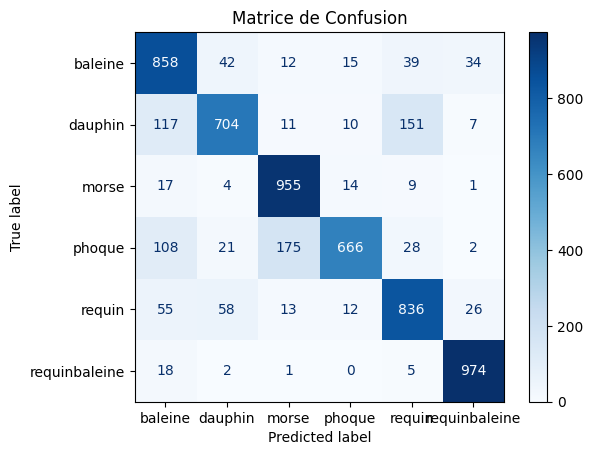

In [11]:
# ***********************************************
#                  QUESTIONS
# ***********************************************
#
# 1) Afficher la matrice de confusion
# 2) Extraire une image mal-classée pour chaque combinaison d'espèces - Voir l'exemple dans l'énoncé.
# ***********************************************

cm = confusion_matrix(y_true, predicted_classes)

# Affichage
labels = list(test_itr.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()



### Identification d’images mal classées pour chaque paire d’espèce

In [19]:
# Dictionnaire pour stocker UNE image par confusion (vraie classe i, prédite j)
confused_images = {}

for i in incorrect:
    true_class = y_true[i]
    pred_class = predicted_classes[i]
    key = (true_class, pred_class)

    # Une seule image par combinaison (i, j)
    if key not in confused_images:
        confused_images[key] = i  # Sauvegarde l'indice de l'image

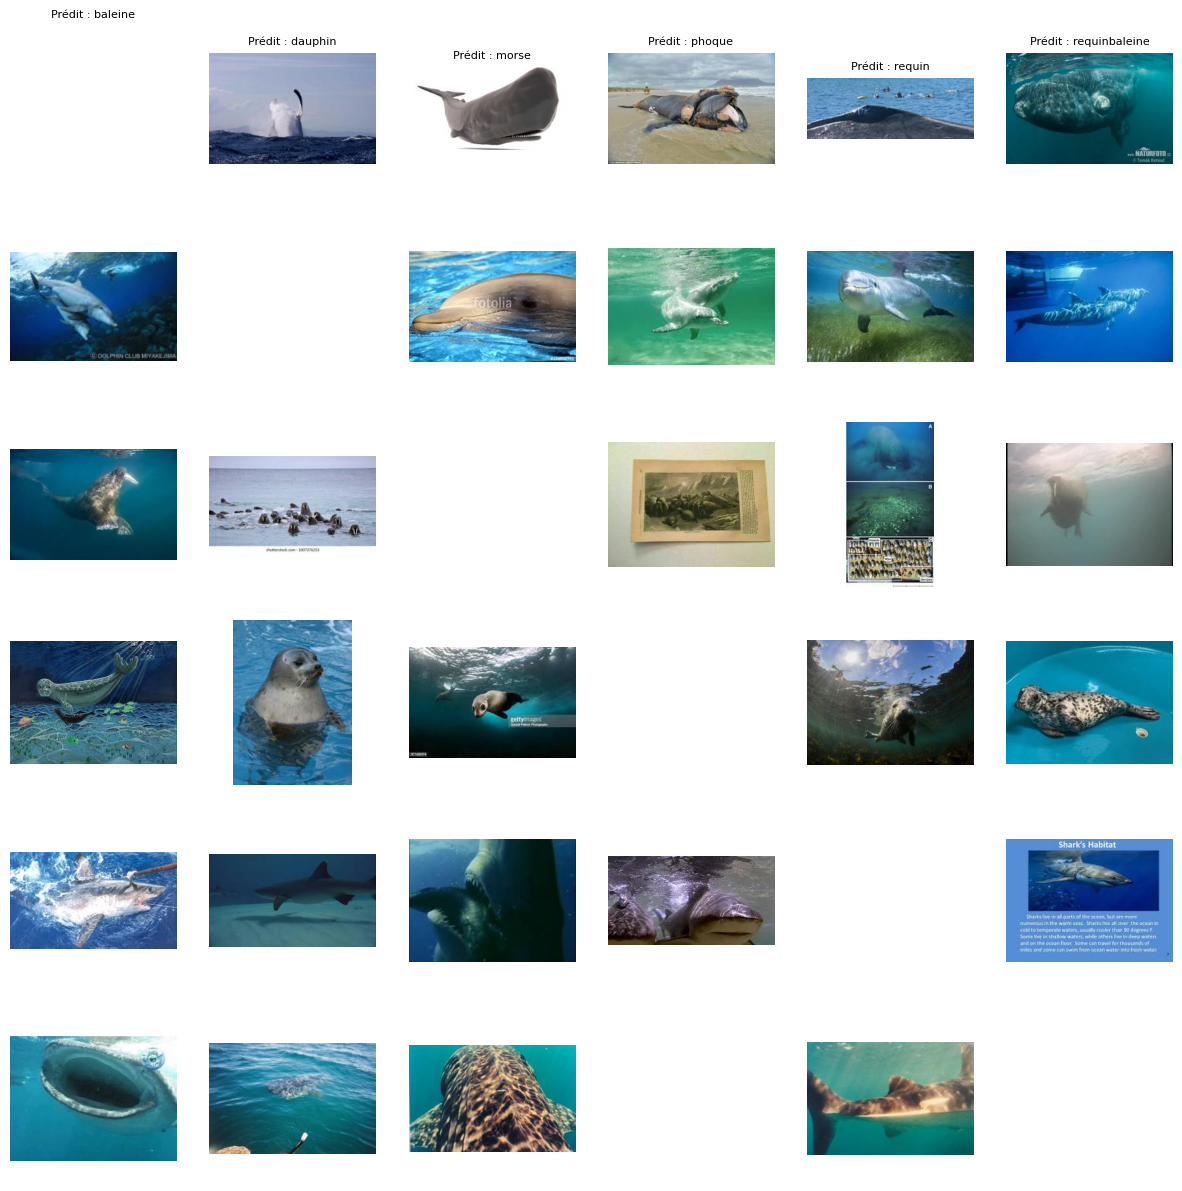

In [20]:
num_classes = len(labels)
fig, axes = plt.subplots(num_classes, num_classes, figsize=(15, 15))

filepaths = test_itr.filepaths  # chemins vers les images

for i in range(num_classes):
    for j in range(num_classes):
        ax = axes[i, j]
        ax.axis("off")

        if (i, j) in confused_images:
            img_idx = confused_images[(i, j)]
            img = mpimg.imread(filepaths[img_idx])
            ax.imshow(img)

        if i == 0:
            ax.set_title(f"Prédit : {labels[j]}", fontsize=8)
        if j == 0:
            ax.set_ylabel(f"Réel : {labels[i]}", fontsize=8)

### Conclusion

Notre modèle a atteint une exactitude de 83 % sur les données de test, dépassant ainsi l’objectif initial fixé à 82 %.
L’analyse de la matrice de confusion révèle que le modèle distingue particulièrement bien les requins-baleines, avec peu de confusions observées avec les autres espèces telles que les phoques, morses, dauphins ou requins. Cela témoigne de la capacité du modèle à capturer des caractéristiques discriminantes propres à cette classe.